In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import Estimate
from EconModel import cpptools

from LimitedCommitmentModel import LimitedCommitmentModelClass

# plot style
linestyles = ['-','--','-.',':',':']
markers = ['o','s','D','*','P']
linewidth = 2
font_size = 17
font = {'size':font_size}
matplotlib.rc('font', **font)


plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})
path = 'output/'

SAVE = False

# c++ settings

do_compile = True
threads = 50

#cpptools.setup_nlopt(folder='cppfuncs/', do_print = True) #install nlopt
# problem: Mange perioder, værdien af HK i første periode er meget lavt, hvis vi ikke har HK, måske ændre til type? Type med højt return og type med lavt return

# Solve the model

In [2]:
# compile c++ files
#T = 20
##sigma_HK = 0.5
#sigma_HK_init = 1.0
#sigma_love = 0.031
specs = {}
for T in [10 , 20 ]:
    for sigma_HK in [0.1,0.5, 1.0]:
        for sigma_HK_init in [0.1, 0.5, 1.0]:
            for sigma_love in [0.031 , 0.0001]:
                #print(T)
                #specs = specs | {f'model NC, NO_HK_T{T}_sHK{sigma_HK}_initHK{sigma_HK_init}_SL{sigma_love}':{'latexname':'limited', 'par':{ 'T':T, 'sigma_HK':sigma_HK, 'sigma_HK_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':2}}}
                specs.update({f'model_FC_NO_HK_T{T}_sHK{sigma_HK}_initHK{sigma_HK_init}_SL{sigma_love}':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':0}}})
                specs.update({f'model_LC_NO_HK_T{T}_sHK{sigma_HK}_initHK{sigma_HK_init}_SL{sigma_love}':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':1}}})
                specs.update({f'model_NC_NO_HK_T{T}_sHK{sigma_HK}_initHK{sigma_HK_init}_SL{sigma_love}':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':2}}})
print(specs)


#sigma_HK_init er stort og T er mindre, det burde give, at initialt betyder noget ved FC, ellers er init_HK er kun en periode ud af 20 --> påvirker ikke barganing

{'model_FC_NO_HK_T10_sHK0.1_initHK0.1_SL0.031': {'latexname': 'limited', 'par': {'T': 10, 'sigma_K': 0.1, 'sigma_K_init': 0.1, 'sigma_love': 0.031, 'do_HK': False, 'threads': 50, 'bargaining': 0}}, 'model_LC_NO_HK_T10_sHK0.1_initHK0.1_SL0.031': {'latexname': 'limited', 'par': {'T': 10, 'sigma_K': 0.1, 'sigma_K_init': 0.1, 'sigma_love': 0.031, 'do_HK': False, 'threads': 50, 'bargaining': 1}}, 'model_NC_NO_HK_T10_sHK0.1_initHK0.1_SL0.031': {'latexname': 'limited', 'par': {'T': 10, 'sigma_K': 0.1, 'sigma_K_init': 0.1, 'sigma_love': 0.031, 'do_HK': False, 'threads': 50, 'bargaining': 2}}, 'model_FC_NO_HK_T10_sHK0.1_initHK0.1_SL0.0001': {'latexname': 'limited', 'par': {'T': 10, 'sigma_K': 0.1, 'sigma_K_init': 0.1, 'sigma_love': 0.0001, 'do_HK': False, 'threads': 50, 'bargaining': 0}}, 'model_LC_NO_HK_T10_sHK0.1_initHK0.1_SL0.0001': {'latexname': 'limited', 'par': {'T': 10, 'sigma_K': 0.1, 'sigma_K_init': 0.1, 'sigma_love': 0.0001, 'do_HK': False, 'threads': 50, 'bargaining': 1}}, 'model_NC_

In [3]:

specs = {}
T = 20
sigma_love = 0.031
sigma_HK = 0.1
sigma_HK_init = 0.1
#specs.update({f'model_FC_NO_HK_T{T}_sHK{sigma_HK}_initHK{sigma_HK_init}_SL{sigma_love}':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':0}}})
#specs.update({f'model_LC_NO_HK_T{T}_sHK{sigma_HK}_initHK{sigma_HK_init}_SL{sigma_love}':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':1}}})
#specs.update({f'model_NC_NO_HK_T{T}_sHK{sigma_HK}_initHK{sigma_HK_init}_SL{sigma_love}':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':2}}})

specs.update({f'model_NC':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':2}}})
specs.update({f'model_LC':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':1}}})
specs.update({f'model_FC':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':0}}})
print(specs)



# solve different models
models = {}
for m,(name,spec) in enumerate(specs.items()):
    print(f'{name} loading...',end='')
    
    # setup model
    models[name] = LimitedCommitmentModelClass(name=name,par=spec['par'])
    models[name].spec = spec

    compile_now = True if do_compile & (m==0) else False
    models[name].link_to_cpp(force_compile=compile_now)
    
    print(' solving...')
    %time models[name].solve() 

    #Save the data 
    T = models[name].par.T
    print(' saving...')
    models[name].sim.init_love[:] = 0.0
    models[name].sim.init_A[:] = 0.0
    np.random.seed(models[name].par.seed)
    data1 = Estimate.create_data_new(models[name],start_p = 1, end_p = T-1, to_xl = True, name_xl = name)


    data1 = Estimate.create_data_new(models[name],start_p = 1, end_p = 2, to_xl = True, name_xl = name)




#model = models['model FC, NO_HK ']
#model.sim.init_love[:] =0.2
##model.simulate()
#print('HK')*
#print(f'Couple {np.mean(model.sim.couple,0)}')

#print(f'Laborw {np.mean(model.sim.labor_w,0)}')
#print(f'Laborm {np.mean(model.sim.labor_m,0)}')
#print(f'Consumption W {np.mean(model.sim.cons_w,0)}')
#print(f'Consumption M {np.mean(model.sim.cons_m,0)}')
#print(f'Asset {np.nanmean(model.sim.A,0)}')
#print(f'HKw {np.mean(model.sim.Kw,0)}')
#print(f'HKm {np.mean(model.sim.Km,0)}')
#temp = model.sim.power
#I = model.sim.couple<1
#nan = np.zeros(I.shape)
#nan[I] = np.nan
#temp = np.nanmean(temp + nan,axis=0)
#print(f'Power {temp}')


{'model_NC': {'latexname': 'limited', 'par': {'T': 20, 'sigma_K': 0.1, 'sigma_K_init': 0.1, 'sigma_love': 0.031, 'do_HK': False, 'threads': 50, 'bargaining': 2}}, 'model_LC': {'latexname': 'limited', 'par': {'T': 20, 'sigma_K': 0.1, 'sigma_K_init': 0.1, 'sigma_love': 0.031, 'do_HK': False, 'threads': 50, 'bargaining': 1}}, 'model_FC': {'latexname': 'limited', 'par': {'T': 20, 'sigma_K': 0.1, 'sigma_K_init': 0.1, 'sigma_love': 0.031, 'do_HK': False, 'threads': 50, 'bargaining': 0}}}
model_NC loading... solving...
Wall time: 23min 4s
 saving...
model_LC loading... solving...
Wall time: 23min 13s
 saving...
model_FC loading... solving...
Wall time: 23min 4s
 saving...


In [4]:
stop

NameError: name 'stop' is not defined

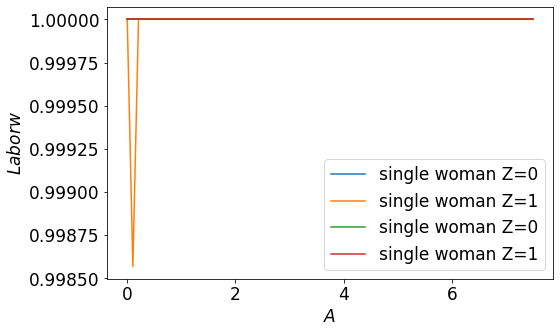

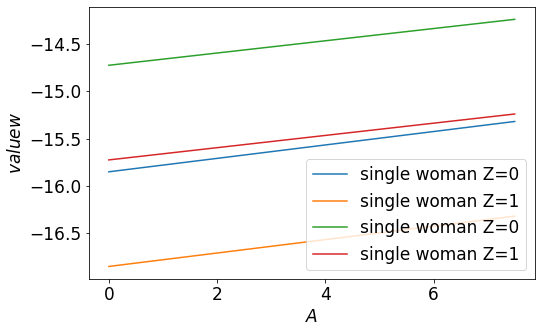

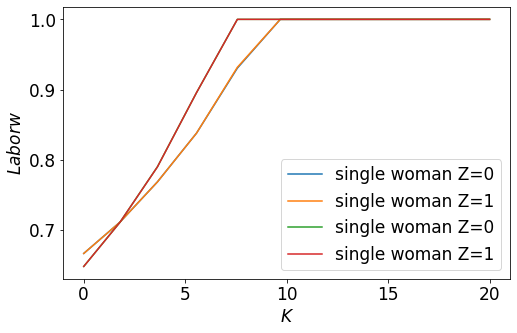

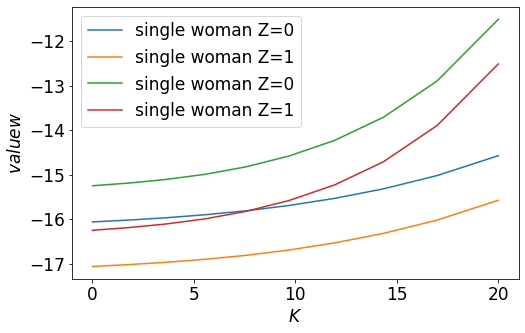

In [5]:
#SINGLE TEST
i_A = 20
i_Z = 0
i_t = 0
i_HK = 5
t = i_t


#sol = models['model 2'].sol
#par = models['model 2'].par


#print(sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm])

#print(sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm])



#print(sol.labor_w_single[t,:,i_HKm])


sol = models['model_LC'].sol
par = models['model_LC'].par




fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_Aw,sol.labor_w_single[t,0,:,i_HK], label = 'single woman Z=0')
ax.plot(par.grid_Aw,sol.labor_w_single[t,1,:,i_HK], label = 'single woman Z=1')
ax.plot(par.grid_Am,sol.labor_m_single[t,0,:,i_HK], label = 'single man Z=0')
ax.plot(par.grid_Am,sol.labor_m_single[t,1,:,i_HK], label = 'single man Z=1')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Laborw$")
plt.legend()
plt.show()



fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_Aw,sol.Vw_single[t,0,:,i_HK], label = 'single woman Z=0')
ax.plot(par.grid_Aw,sol.Vw_single[t,1,:,i_HK], label = 'single woman Z=1')
ax.plot(par.grid_Am,sol.Vm_single[t,0,:,i_HK], label = 'single man Z=0')
ax.plot(par.grid_Am,sol.Vm_single[t,1,:,i_HK], label = 'single man Z=1')                           
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$valuew$")
plt.legend()
plt.show()





fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_K,sol.labor_w_single[t,0,i_A,:], label = 'single woman Z=0')
ax.plot(par.grid_K,sol.labor_w_single[t,1,i_A,:], label = 'single woman Z=1')
ax.plot(par.grid_K,sol.labor_m_single[t,0,i_A,:], label = 'single man Z=0')
ax.plot(par.grid_K,sol.labor_m_single[t,1,i_A,:], label = 'single man Z=1')                      
ax.set_xlabel(f"$K$")
ax.set_ylabel(f"$Laborw$")
plt.legend()
plt.show()



fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_K,sol.Vw_single[t,0,i_A,:], label = 'single woman Z=0')
ax.plot(par.grid_K,sol.Vw_single[t,1,i_A,:], label = 'single woman Z=1')
ax.plot(par.grid_K,sol.Vm_single[t,0,i_A,:], label = 'single man Z=0')
ax.plot(par.grid_K,sol.Vm_single[t,1,i_A,:], label = 'single man Z=1')                           
ax.set_xlabel(f"$K$")
ax.set_ylabel(f"$valuew$")
plt.legend()
plt.show()



In [ ]:
#COUPLE TEST
i_P = 4
i_L = 9
i_A = 20
i_t = 0
i_HKw = 5
i_HKm = 5
t = i_t


#sol = models['model 2'].sol
#par = models['model 2'].par


#print(sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm])

#print(sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm])



#print(sol.labor_w_single[t,:,i_HKm])


sol = models['model_LC'].sol
par = models['model_LC'].par



#TEST COUPLE!!
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_Aw,sol.labor_w_couple[t,0,0,i_P,i_L,:,i_HKw,i_HKm], label = 'single woman Zw=0, Zm=0')
ax.plot(par.grid_Aw,sol.labor_w_couple[t,1,:,i_HK], label = 'single woman Z=1')
ax.plot(par.grid_Am,sol.labor_m_couple[t,0,:,i_HK], label = 'single woman Z=0')
ax.plot(par.grid_Am,sol.labor_m_cpple[t,1,:,i_HK], label = 'single woman Z=1')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Laborw$")
plt.legend()
plt.show()



fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_Aw,sol.Vw_single[t,0,:,i_HK], label = 'single woman Z=0')
ax.plot(par.grid_Aw,sol.Vw_single[t,1,:,i_HK], label = 'single woman Z=1')
ax.plot(par.grid_Am,sol.Vm_single[t,0,:,i_HK], label = 'single woman Z=0')
ax.plot(par.grid_Am,sol.Vm_single[t,1,:,i_HK], label = 'single woman Z=1')                           
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$valuew$")
plt.legend()
plt.show()





fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_K,sol.labor_w_single[t,0,i_A,:], label = 'single woman Z=0')
ax.plot(par.grid_K,sol.labor_w_single[t,1,i_A,:], label = 'single woman Z=1')
ax.plot(par.grid_K,sol.labor_m_single[t,0,i_A,:], label = 'single woman Z=0')
ax.plot(par.grid_K,sol.labor_m_single[t,1,i_A,:], label = 'single woman Z=1')                      
ax.set_xlabel(f"$K$")
ax.set_ylabel(f"$Laborw$")
plt.legend()
plt.show()



fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_K,sol.Vw_single[t,0,i_A,:], label = 'single woman Z=0')
ax.plot(par.grid_K,sol.Vw_single[t,1,i_A,:], label = 'single woman Z=1')
ax.plot(par.grid_K,sol.Vm_single[t,0,i_A,:], label = 'single woman Z=0')
ax.plot(par.grid_K,sol.Vm_single[t,1,i_A,:], label = 'single woman Z=1')                           
ax.set_xlabel(f"$K$")
ax.set_ylabel(f"$valuew$")
plt.legend()
plt.show()



In [ ]:


#model = models['model FC, NO_HK ']
#model.sim.init_love[:] =0.2
##model.simulate()
#print('HK')*
#print(f'Couple {np.mean(model.sim.couple,0)}')

#print(f'Laborw {np.mean(model.sim.labor_w,0)}')
#print(f'Laborm {np.mean(model.sim.labor_m,0)}')
#print(f'Consumption W {np.mean(model.sim.cons_w,0)}')
#print(f'Consumption M {np.mean(model.sim.cons_m,0)}')
#print(f'Asset {np.nanmean(model.sim.A,0)}')
#print(f'HKw {np.mean(model.sim.Kw,0)}')
#print(f'HKm {np.mean(model.sim.Km,0)}')
#temp = model.sim.power
#I = model.sim.couple<1
#nan = np.zeros(I.shape)
#nan[I] = np.nan
#temp = np.nanmean(temp + nan,axis=0)
#print(f'Power {temp}')


model = models[f'model_LC']
#model.sim.init_love[:] =0.1
#model.sim.init_A[:] = 6.0
#model.simulate()
print('NO hk')

i = 5
#note kvinden tjenner fx meget mere i en periode: 
    #højere barganing --> hun arbjeder mnindre , mand mere
    # højere indkomst --> hun og hendes mand arbjeder mindre. Dermed skal X5 påvirkes også her (INDKOMSTEFFEKT)
print(f'Person i, init init_distr {model.sim.init_distr[i]}')
print(f'Person i, init init_distrpowerlag {model.sim.init_distr_power_lag[i]}')
print(f'Person i, power {model.sim.power[i,:]}')
print(f'Person i, Zw {model.sim.Zw[i]}')
print(f'Person i, Zm {model.sim.Zm[i]}')
print(f'Person i, Kw {model.sim.Kw[i]}')
print(f'Person i, Km {model.sim.Km[i]}')
print(f'Person i, Laborw {model.sim.labor_w[i]}')
print(f'Person i, Laborm {model.sim.labor_m[i]}')
print(f'Person i, A {model.sim.A[i]}')
print(f'Person i, Aw {model.sim.Aw[i]}')
print(f'Person i, Am {model.sim.Am[i]}')
print(f'Person i, consw {model.sim.cons_w[i]}')
print(f'Couple {np.mean(model.sim.couple,0)}')

print(f'Laborw {np.mean(model.sim.labor_w,0)}')
print(f'Laborm {np.mean(model.sim.labor_m,0)}')
print(f'Consumption W {np.mean(model.sim.cons_w,0)}')
print(f'Consumption M {np.mean(model.sim.cons_m,0)}')
print(f'Asset {np.nanmean(model.sim.A,0)}')
print(f'Asset min {np.nanmin(model.sim.A,0)}')
print(f'Asset max {np.nanmax(model.sim.A,0)}')
print(f'Asset W {np.nanmean(model.sim.Aw,0)}')
print(f'Asset M {np.nanmean(model.sim.Am,0)}')
print(f'w {np.mean(model.sim.Zw,0)}')
print(f'Zm {np.mean(model.sim.Zm,0)}')
print(f'HKw {np.mean(model.sim.Kw,0)}')
print(f'HKm {np.mean(model.sim.Km,0)}')
print(f'HKw max {np.max(model.sim.Kw,0)}')
print(f'HKm max {np.max(model.sim.Km,0)}')
print(f'HKw min {np.min(model.sim.Kw,0)}')
print(f'HKm min {np.min(model.sim.Km,0)}')
print(f'Power mean {np.mean(model.sim.power,0)}')
print(f'Power min {np.min(model.sim.power,0)}')
print(f'Power max {np.max(model.sim.power,0)}')




NO hk
Person i, init init_distr 1
Person i, init init_distrpowerlag 0.12001299670807204
Person i, power [ 0.420013  0.420013 -1.       -1.       -1.       -1.       -1.
 -1.       -1.       -1.      ]
Person i, Zw [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Person i, Zm [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Person i, Kw [1.00327045 1.42478262 2.01177156 2.56892058 2.69745881 2.99534114
 3.43183401 4.50177592 5.08119292 5.31639612]
Person i, Km [1.12942394 1.43494623 1.6954981  2.2105878  3.05641654 4.42077115
 4.00702199 5.38380908 5.35588851 4.86832407]
Person i, Laborw [0.80627281 0.72040461 0.67318625 0.68758223 0.68992103 0.70674518
 0.70790369 0.72624624 0.70419895 0.66824764]
Person i, Laborm [0.74738546 0.70165379 0.6464304  0.67089446 0.69919859 0.71138801
 0.65847051 0.68582686 0.63934586 0.59522739]
Person i, A [2.05801402 4.59170161 2.85291899 2.54331507 1.95512636 2.06943728
 0.71973407 0.41430196 0.31449076 1.19017331]
Person i, Aw [1.02900701 2.29585081 1.53205262 0.98615233 0.4877787  0.2

0.17005992887045385
0.40462567522381887
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
0.12050720705932783
1.5752877570614197
[0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.41312005 0.49270751]
power mean [0.5        0.5        0.5        0.4999989  0.49982842 0.49874748
 0.49567616 0.49032608 0.48164054 0.45893999]
power min [ 0.5         0.5         0.5         0.48304133  0.41603964  0.34852693
  0.33474968 -1.         -1.         -1.        ]
power max [0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.52638632]
Kw [1.99991622 1.99241943 2.90897843 3.76047495 4.55808104 4.9850127
 5.69764106 6.44182034 7.28328528 7.34640715]
[0. 0. 0. ... 0. 0. 0.]
[[8.95428705e-02 1.06618944e-03]
 [1.06618944e-03 8.88323720e-05]]
[[ 8.95428705e-02 -3.82167146e-06]
 [-3.82167146e-06  5.31870575e-05]]
[[ 6.31062361e-02 -2.94450541e-04]
 [-2.94450541e-04  8.88323720e-05]]
[0. 0. 1. ... 0. 0. 1.]


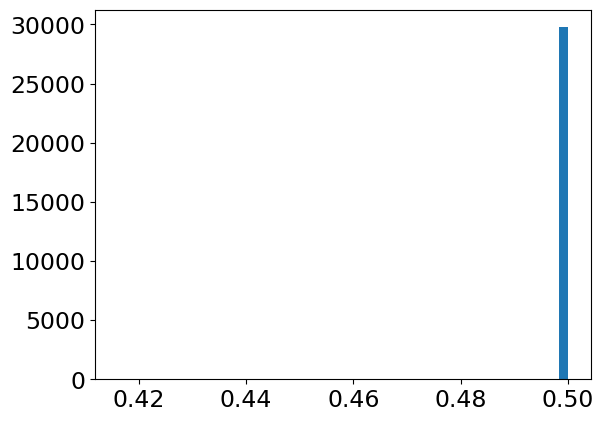

[[ 5.71333464e-06 -8.32234143e-06]
 [-8.32234143e-06  2.50007196e-01]]


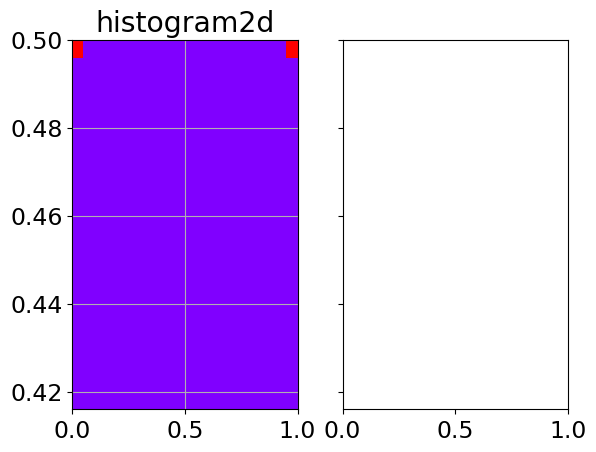

In [ ]:

i = 10
print(model.sim.init_Kw[i])
print(model.sim.init_Km[i])
print(model.sim.power[i,:])



i = 1
print(model.sim.init_Kw[i])
print(model.sim.init_Km[i])
print(model.sim.power[i,:])



t = 4
print(f'power mean {np.mean(model.sim.power,0)}')
print(f'power min {np.min(model.sim.power,0)}')
print(f'power max {np.max(model.sim.power,0)}')
print(f'Kw {np.max(model.sim.Kw,0)}')


I = model.sim.couple[:,t]<1.0
nan = np.zeros(I.shape)
nan[I] = np.nan
print(nan)

init_barg = model.sim.init_Kw > model.sim.init_Km
init_barg = init_barg+nan

sim_power= model.sim.power[:,t]
sim_power= sim_power+ nan



print(np.cov(model.sim.Kw[:,t],model.sim.labor_w[:,t]))

print(np.cov(model.sim.Kw[:,t],model.sim.labor_w[:,t-1]))

print(np.cov(model.sim.Kw[:,t-1],model.sim.labor_w[:,t]))


print(init_barg)
plt.hist(model.sim.power[:,t], bins = 50 )
plt.show()

print(np.cov(model.sim.power[:,t],init_barg))
H, yedges, xedges = np.histogram2d(model.sim.power[:,t], init_barg, bins=20)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
ax1.pcolormesh(xedges, yedges, H, cmap='rainbow')
ax1.set_title('histogram2d')
ax1.grid()
plt.show()

0.11111111111111116
0.778258304584832
9.686578635954382
9.686578635954382
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994]


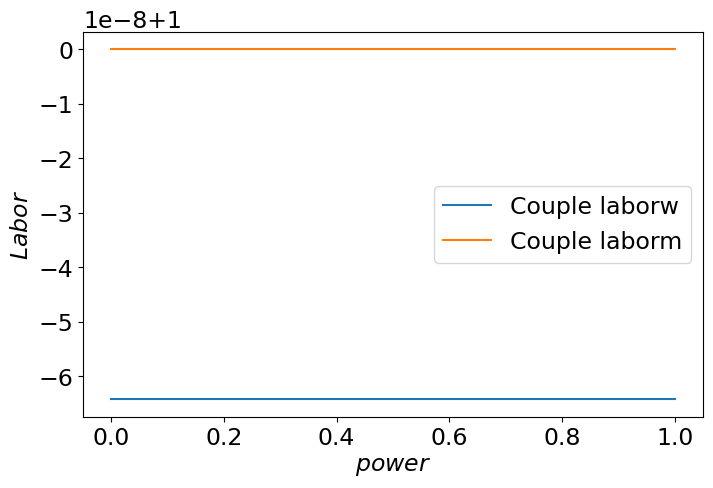

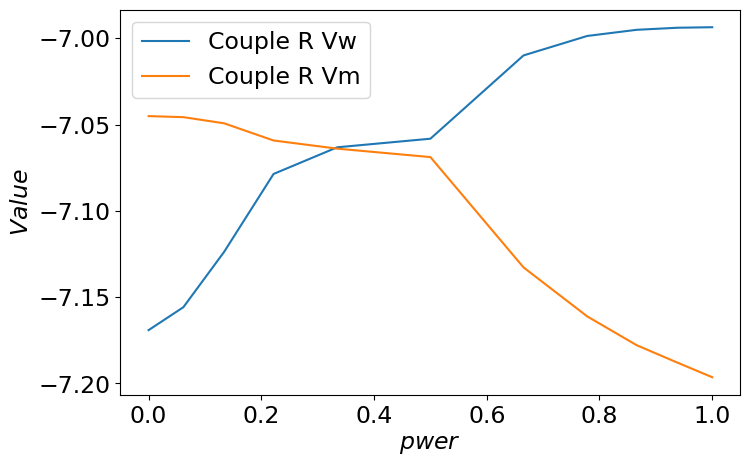

-8.904715533191293
-8.300644250891455


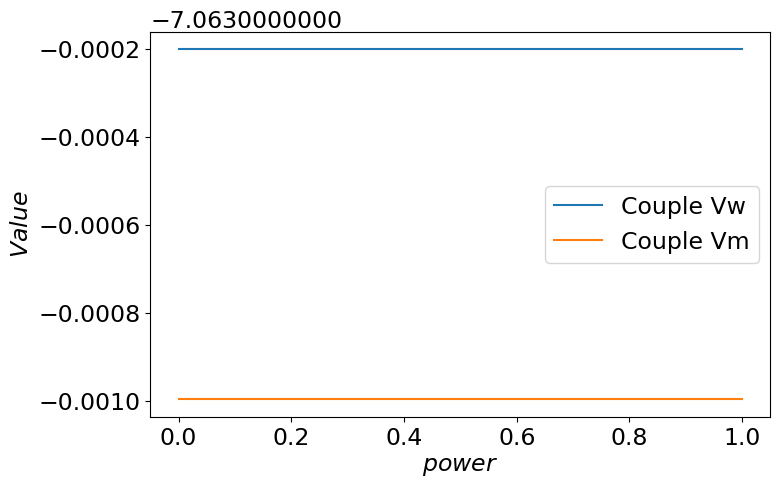

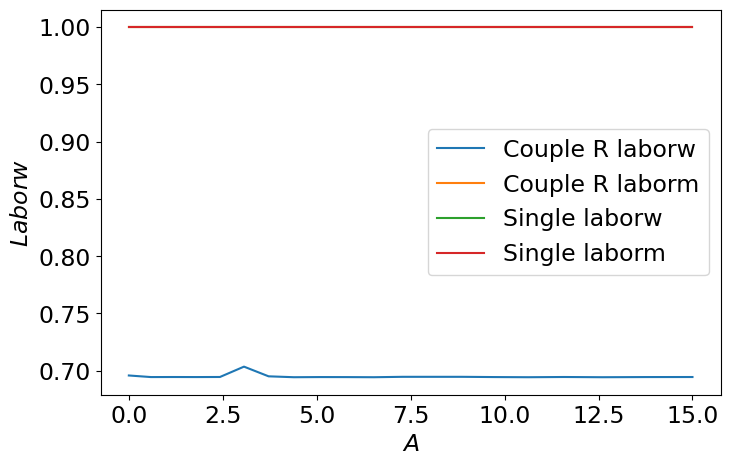

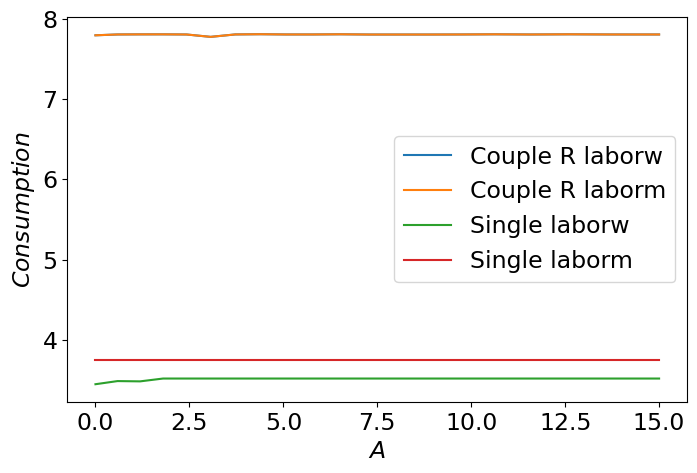

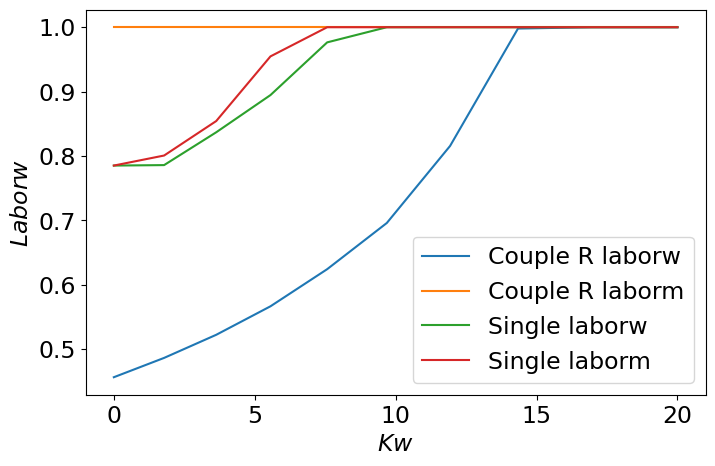

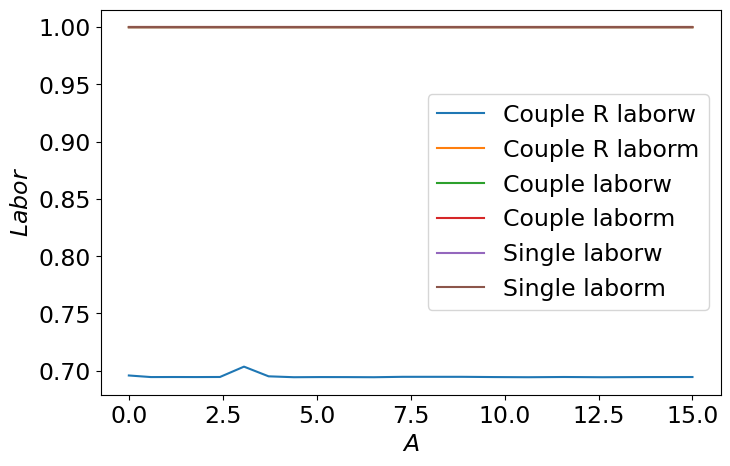

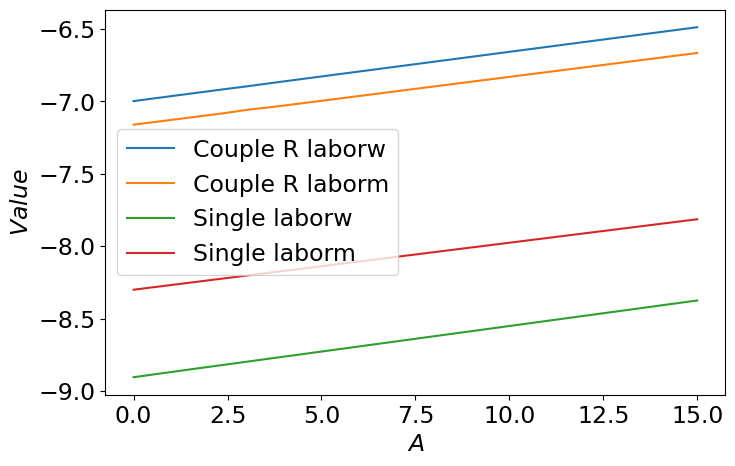

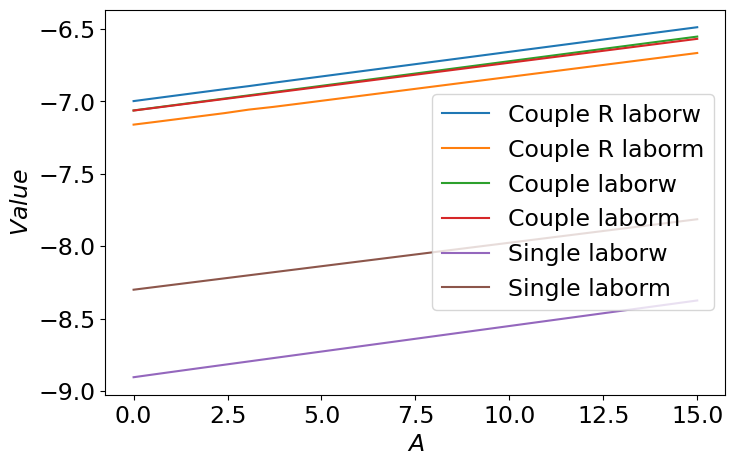

In [ ]:
i_P = 7
#DENNE BETYDER NOGET, ved 5 så ser kvinder underlige ud, den burde ikke betyde noget
#i_P = 8
i_A = 0
i_L = 5
i_t = 0
i_HKw = 5
i_HKm = 5
t = i_t


#sol = models['model 2'].sol
#par = models['model 2'].par


#print(sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm])

#print(sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm])



#print(sol.labor_w_single[t,:,i_HKm])


sol = models['model_NC'].sol
par = models['model_NC'].par
print(par.grid_love[i_L])
print(par.grid_power[i_P])
print(par.grid_K[i_HKw])
print(par.grid_K[i_HKm])

print(sol.labor_m_couple[t,:,i_L,i_A,i_HKw,i_HKm])
print(sol.labor_w_couple[t,:,i_L,i_A,i_HKw,i_HKm])


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_power,sol.labor_w_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple laborw')
ax.plot(par.grid_power,sol.labor_m_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple laborm')
ax.set_xlabel(f"$power$")
ax.set_ylabel(f"$Labor$")
plt.legend()
plt.show()

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_power,sol.Vw_remain_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple R Vw')
ax.plot(par.grid_power,sol.Vm_remain_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple R Vm')
ax.set_xlabel(f"$pwer$")
ax.set_ylabel(f"$Value$")
plt.legend()
plt.show()

print(sol.Vw_single[t,i_A,i_HKw])
print(sol.Vm_single[t,i_A,i_HKm])
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_power,sol.Vw_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple Vw')
ax.plot(par.grid_power,sol.Vm_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple Vm')                   
ax.set_xlabel(f"$power$")
ax.set_ylabel(f"$Value$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.labor_m_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.labor_w_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.labor_m_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Laborw$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.cons_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.cons_m_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.cons_w_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.cons_m_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Consumption$")
plt.legend()
plt.show()




fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_K,sol.labor_w_remain_couple[t,i_P,i_L,i_A,:,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_K,sol.labor_m_remain_couple[t,i_P,i_L,i_A,:,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_K,sol.labor_w_single[t,i_A,:], label = 'Single laborw')
ax.plot(par.grid_K,sol.labor_m_single[t,i_A,:], label = 'Single laborm')                      
ax.set_xlabel(f"$Kw$")
ax.set_ylabel(f"$Laborw$")
plt.legend()
plt.show()



fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.labor_m_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborw')
ax.plot(par.grid_A,sol.labor_m_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborm')
ax.plot(par.grid_A,sol.labor_w_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.labor_m_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Labor$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.Vw_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.Vm_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.Vw_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.Vm_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Value$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.Vw_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.Vm_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.Vw_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborw')
ax.plot(par.grid_A,sol.Vm_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborm')
ax.plot(par.grid_A,sol.Vw_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.Vm_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Value$")
plt.legend()
plt.show()







# Estimate the model

In [ ]:
#Save the data 
model = models['model NC, NO_HK ']
model.sim.init_love[:] =0.1
model.sim.init_A[:] = 6.0
np.random.seed(model.par.seed)
data1 = Estimate.create_data_new(model,start_p = 9, end_p = 19, to_xl = True, name_xl = 'simulated_data_NC_NO_HK4')


In [ ]:
#Save the data 
#model = models['model LC, NO_HK ']
#model.sim.init_love[:] =0.1
#model.sim.init_A[:] = 6.0
#np.random.seed(model.par.seed)
#data1 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_LC_NO_HK2')


model = models['model LC, HK ']
model.sim.init_love[:] =0.3
model.sim.init_A[:] = 6.0
np.random.seed(model.par.seed)
data2 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_LC_HK')

#model = models['model NC, NO_HK ']
#model.sim.init_love[:] =0.1
#model.sim.init_A[:] = 6.0
#np.random.seed(model.par.seed)
#data1 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_NC_NO_HK2')


model = models['model NC, HK ']
model.sim.init_love[:] =0.3
model.sim.init_A[:] = 6.0
np.random.seed(model.par.seed)
data2 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_NC_HK')

#Save the data 
#model = models['model FC, NO_HK ']
#model.sim.init_love[:] =0.1
#model.sim.init_A[:] = 6.0
#np.random.seed(model.par.seed)
#data1 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_FC_NO_HK2')


model = models['model FC, HK ']
model.sim.init_love[:] =0.3
model.sim.init_A[:] = 6.0
np.random.seed(model.par.seed)
data2 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_FC_HK')


In [ ]:

#Estimate the model one time
data_reg = Estimate.aux_est(data2,print_reg=True)
data_reg, Wald_FC, Wald_NC = Estimate.main_est(data_reg,print_reg=True) 